<a href="https://colab.research.google.com/github/Jebasta-J/social-media-addiction-prediction/blob/main/social_media_addiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **APPROACH TO THE DATASET**

1. Load the data and the libraries
2. Data preparation and data preprocessing
3. Data Visualization
4. Data Analysis
  1. Bi-Variate Analysis
5. Encoding
6. Splitting Of Data
7. Data Modelling
8. Evaluation on Test Dataset

# **1. LOAD THE DATASET AND LIBRARIES**

In [ ]:
#standard set of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
dataset=pd.read_csv("/content/Students Social Media Addiction.csv")

# **2. DATA PREPARATION**

## DATA AUDITING

In [ ]:
dataset.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1.0,19.0,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6.0,In Relationship,3.0,8.0
1,2.0,22.0,Male,Graduate,India,2.1,Twitter,No,7.5,8.0,Single,0.0,3.0
2,3.0,20.0,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5.0,Complicated,4.0,9.0
3,4.0,18.0,Male,High School,UK,3.0,YouTube,No,7.0,7.0,Single,1.0,NaN
4,5.0,21.0,Male,Graduate,Canada,4.5,Facebook,NaN,6.0,6.0,In Relationship,2.0,7.0


In [ ]:
dataset.tail()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
700,701.0,20.0,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,NaN,In Relationship,2.0,5.0
701,702.0,23.0,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4.0,Single,5.0,9.0
702,703.0,21.0,NaN,Undergraduate,China,5.6,WeChat,Yes,6.7,6.0,In Relationship,3.0,7.0
703,704.0,24.0,Male,Graduate,Japan,4.3,Twitter,No,7.5,8.0,Single,2.0,4.0
704,705.0,19.0,Female,Undergraduate,Poland,6.2,Facebook,Yes,6.3,5.0,Single,4.0,8.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    695 non-null    float64
 1   Age                           692 non-null    float64
 2   Gender                        699 non-null    object 
 3   Academic_Level                695 non-null    object 
 4   Country                       699 non-null    object 
 5   Avg_Daily_Usage_Hours         697 non-null    float64
 6   Most_Used_Platform            701 non-null    object 
 7   Affects_Academic_Performance  699 non-null    object 
 8   Sleep_Hours_Per_Night         696 non-null    float64
 9   Mental_Health_Score           697 non-null    float64
 10  Relationship_Status           698 non-null    object 
 11  Conflicts_Over_Social_Media   699 non-null    float64
 12  Addicted_Score                698 non-null    float64
dtypes: fl

**REPORT**:
1. OBJECTIVE- To find if students academic performace is affected by social media addiction
2. DATASET NAME- Students social media addiction
3. TARGET VARIABLE- Addicted_Score
4. TOTAL NUM OF COLUMNS-13
5. TOTAL NUM OF ROWS-705
6. MISSING VALUES- Yes


# **3. EDA**

##  BIVARIATE ANALYSIS

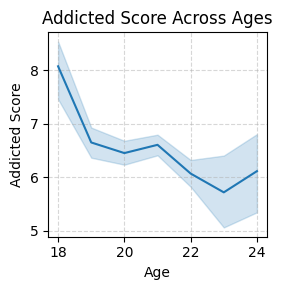

In [ ]:
plt.figure(figsize=(3,3))
sns.lineplot(x='Age', y='Addicted_Score', data=dataset)
plt.title("Addicted Score Across Ages")
plt.xlabel("Age")
plt.ylabel("Addicted Score")
plt.grid(True, linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

The bivariate analysis between Age and Addicted_Score indicates that teenagers and young adults tend to exhibit higher levels of social media addiction compared to other age groups

<ipython-input-7-4048597109>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Addicted_Score',
<ipython-input-7-4048597109>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Addicted_Score',


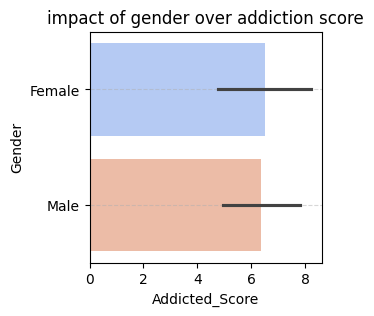

In [ ]:
plt.figure(figsize=(3,3))
sns.barplot(x='Addicted_Score',
            y='Gender',
            data=dataset,
            palette='coolwarm',
            ci='sd')  # or ci=95 for confidence interval
plt.title("impact of gender over addiction score")
plt.xlabel("Addicted_Score")
plt.ylabel("Gender")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

The analysis shows that gender does not have a significant impact on social media addiction, as both male and female participants exhibit similar levels of addiction.

<ipython-input-8-3771553537>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Addicted_Score',
<ipython-input-8-3771553537>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Addicted_Score',


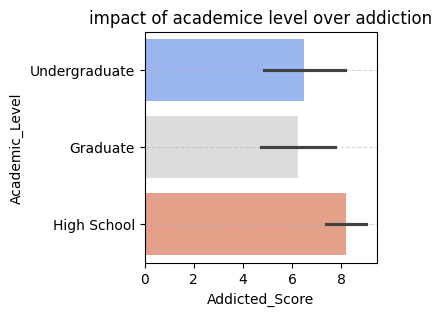

In [ ]:
plt.figure(figsize=(3,3))
sns.barplot(x='Addicted_Score',
            y='Academic_Level',
            data=dataset,
            palette='coolwarm',
            ci='sd')  # or ci=95 for confidence interval
plt.title("impact of academice level over addiction")
plt.xlabel("Addicted_Score")
plt.ylabel("Academic_Level")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

The analysis indicates that academic level does not significantly influence social media addiction; however, high school students (teenagers) demonstrate notably higher addiction levels compared to individuals at other academic stages.

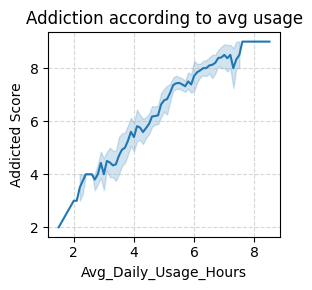

In [ ]:
plt.figure(figsize=(3,3))
sns.lineplot(x='Avg_Daily_Usage_Hours', y='Addicted_Score', data=dataset)
plt.title("Addiction according to avg usage")
plt.xlabel("Avg_Daily_Usage_Hours")
plt.ylabel("Addicted Score")
plt.grid(True, linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

The analysis reveals a positive correlation between average daily social media usage and the addiction score, indicating that individuals who spend more time on social media tend to have higher levels of addiction

<ipython-input-10-2902494492>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Addicted_Score',
<ipython-input-10-2902494492>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Addicted_Score',


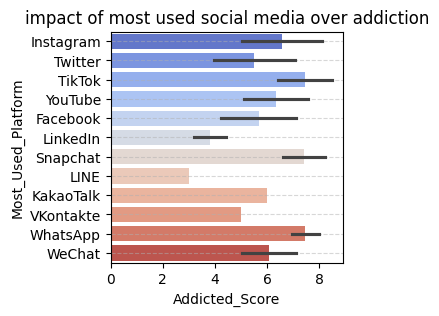

In [ ]:
plt.figure(figsize=(3,3))
sns.barplot(x='Addicted_Score',
            y='Most_Used_Platform',
            data=dataset,
            palette='coolwarm',
            ci='sd')  # or ci=95 for confidence interval
plt.title("impact of most used social media over addiction")
plt.xlabel("Addicted_Score")
plt.ylabel("Most_Used_Platform")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

The analysis suggests that the most frequently used social media platforms contribute equally to the overall level of addiction, with no single platform showing a disproportionately higher influence.

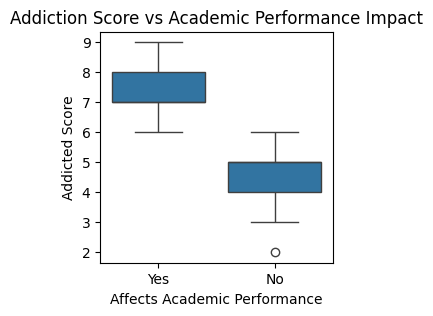

In [ ]:
plt.figure(figsize=(3,3))
sns.boxplot(x='Affects_Academic_Performance', y='Addicted_Score', data=dataset)
plt.title("Addiction Score vs Academic Performance Impact")
plt.xlabel("Affects Academic Performance")
plt.ylabel("Addicted Score")
plt.show()

The findings indicate that social media addiction negatively impacts academic performance; individuals with academic scores below 6 tend to exhibit higher levels of addiction, whereas those with higher academic performance show lower addiction levels.

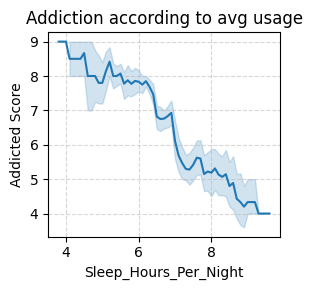

In [ ]:
plt.figure(figsize=(3,3))
sns.lineplot(x='Sleep_Hours_Per_Night', y='Addicted_Score', data=dataset)
plt.title("Addiction according to avg usage")
plt.xlabel("Sleep_Hours_Per_Night")
plt.ylabel("Addicted Score")
plt.grid(True, linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

The analysis indicates that social media addiction adversely affects sleep duration, with individuals reporting fewer hours of sleep per night exhibiting higher levels of addiction.

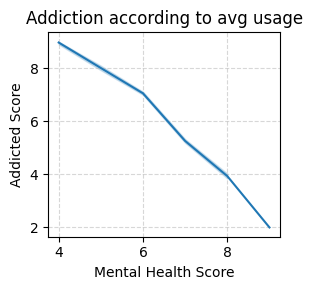

In [ ]:
plt.figure(figsize=(3,3))
sns.lineplot(x='Mental_Health_Score', y='Addicted_Score', data=dataset)
plt.title("Addiction according to avg usage")
plt.xlabel("Mental Health Score")
plt.ylabel("Addicted Score")
plt.grid(True, linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

The analysis reveals an inverse relationship between mental health and social media addiction, indicating that individuals with lower mental health scores tend to exhibit higher levels of social media addiction.

<ipython-input-14-692426918>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Addicted_Score',
<ipython-input-14-692426918>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Addicted_Score',


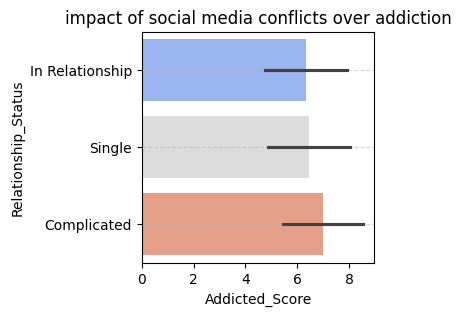

In [ ]:
plt.figure(figsize=(3,3))
sns.barplot(x='Addicted_Score',
            y='Relationship_Status',
            data=dataset,
            palette='coolwarm',
            ci='sd')  # or ci=95 for confidence interval
plt.title("impact of social media conflicts over addiction")
plt.xlabel("Addicted_Score")
plt.ylabel("Relationship_Status")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

The analysis shows that relationship status has minimal impact on social media addiction, with individuals across different relationship categories exhibiting similar addiction scores.

<ipython-input-15-703623998>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Addicted_Score',
<ipython-input-15-703623998>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Addicted_Score',


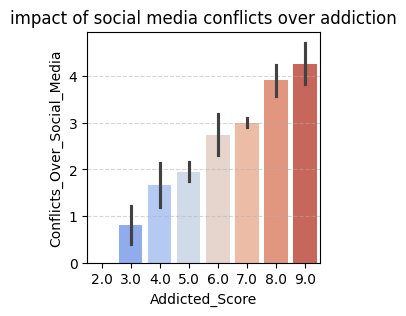

In [ ]:
plt.figure(figsize=(3,3))
sns.barplot(x='Addicted_Score',
            y='Conflicts_Over_Social_Media',
            data=dataset,
            palette='coolwarm',
            ci='sd')  # or ci=95 for confidence interval
plt.title("impact of social media conflicts over addiction")
plt.xlabel("Addicted_Score")
plt.ylabel("Conflicts_Over_Social_Media")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


The analysis indicates a positive correlation between social media-related conflicts and addiction levels, suggesting that individuals experiencing more frequent conflicts due to social media usage tend to have higher addiction scores.

<ipython-input-16-3502754810>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Relationship_Status',
<ipython-input-16-3502754810>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Relationship_Status',


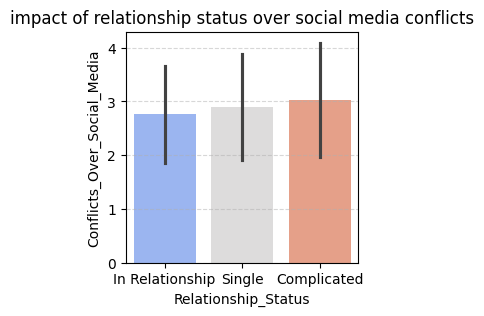

In [ ]:
plt.figure(figsize=(3,3))
sns.barplot(x='Relationship_Status',
            y='Conflicts_Over_Social_Media',
            data=dataset,
            palette='coolwarm',
            ci='sd')  # or ci=95 for confidence interval
plt.title("impact of relationship status over social media conflicts")
plt.xlabel("Relationship_Status")
plt.ylabel("Conflicts_Over_Social_Media")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

The analysis reveals that relationship status does not have a significant impact on the frequency of social media-related conflicts, indicating a consistent pattern across different relationship categories.

#**4.DATA PREPROCESSING**

In [ ]:
dataset.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,695.000000,692.000000,697.000000,696.000000,697.000000,699.000000,698.000000
mean,353.987050,20.658960,4.923673,6.874138,6.225251,2.849785,6.439828
std,204.115364,1.399563,1.259686,1.124927,1.108766,0.958470,1.589949
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.500000,19.750000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,354.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,531.500000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [ ]:
print(dataset.isnull().sum())


Student_ID                      10
Age                             13
Gender                           6
Academic_Level                  10
Country                          6
Avg_Daily_Usage_Hours            8
Most_Used_Platform               4
Affects_Academic_Performance     6
Sleep_Hours_Per_Night            9
Mental_Health_Score              8
Relationship_Status              7
Conflicts_Over_Social_Media      6
Addicted_Score                   7
dtype: int64


Rows containing null values were dropped from the dataset, as the missing entries corresponded to critical and sensitive attributes such as age, gender, and mental health, which are essential for accurate analysis.

In [ ]:
dataset_cleaned = dataset.dropna()

The 'Student_ID' column was dropped as it serves solely as a unique identifier and could lead the model to learn patterns based on individual IDs rather than meaningful features. Additionally, the 'Country' column was removed since it does not provide significant contribution to the prediction of the target variable.

In [ ]:
dataset_cleaned.drop(columns=['Student_ID','Country'],inplace=True)

<ipython-input-20-4030204541>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cleaned.drop(columns=['Student_ID','Country'],inplace=True)


In [ ]:
dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, 0 to 704
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           613 non-null    float64
 1   Gender                        613 non-null    object 
 2   Academic_Level                613 non-null    object 
 3   Avg_Daily_Usage_Hours         613 non-null    float64
 4   Most_Used_Platform            613 non-null    object 
 5   Affects_Academic_Performance  613 non-null    object 
 6   Sleep_Hours_Per_Night         613 non-null    float64
 7   Mental_Health_Score           613 non-null    float64
 8   Relationship_Status           613 non-null    object 
 9   Conflicts_Over_Social_Media   613 non-null    float64
 10  Addicted_Score                613 non-null    float64
dtypes: float64(6), object(5)
memory usage: 57.5+ KB


# **5. DATA ENCODING**

In [ ]:
le = LabelEncoder()
binary_cols = ['Gender','Academic_Level','Affects_Academic_Performance','Most_Used_Platform','Relationship_Status']
for col in binary_cols:
    dataset_cleaned[col] = le.fit_transform(dataset_cleaned[col])

<ipython-input-22-269307932>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cleaned[col] = le.fit_transform(dataset_cleaned[col])
<ipython-input-22-269307932>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cleaned[col] = le.fit_transform(dataset_cleaned[col])
<ipython-input-22-269307932>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [ ]:
dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, 0 to 704
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           613 non-null    float64
 1   Gender                        613 non-null    int64  
 2   Academic_Level                613 non-null    int64  
 3   Avg_Daily_Usage_Hours         613 non-null    float64
 4   Most_Used_Platform            613 non-null    int64  
 5   Affects_Academic_Performance  613 non-null    int64  
 6   Sleep_Hours_Per_Night         613 non-null    float64
 7   Mental_Health_Score           613 non-null    float64
 8   Relationship_Status           613 non-null    int64  
 9   Conflicts_Over_Social_Media   613 non-null    float64
 10  Addicted_Score                613 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 57.5 KB


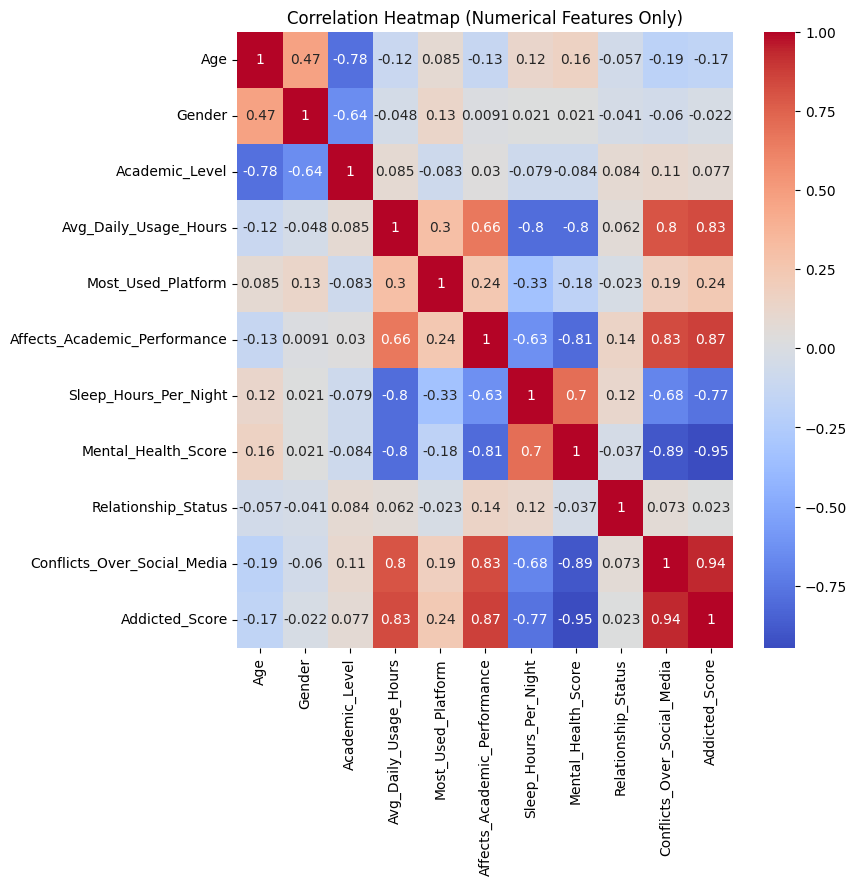

Addicted_Score                  1.000000
Conflicts_Over_Social_Media     0.937319
Affects_Academic_Performance    0.865578
Avg_Daily_Usage_Hours           0.829492
Most_Used_Platform              0.236095
Academic_Level                  0.077473
Relationship_Status             0.022821
Gender                         -0.022210
Age                            -0.165471
Sleep_Hours_Per_Night          -0.765754
Mental_Health_Score            -0.945288
Name: Addicted_Score, dtype: float64


In [ ]:
# Correlation matrix
df_numeric = dataset_cleaned.select_dtypes(include='number')

# Correlation matrix of only numerical columns
correlation = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

# Print correlation with the target variable
print(correlation['Addicted_Score'].sort_values(ascending=False))

# **6. SPLITTING OF DATA**

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(dataset_cleaned.drop('Addicted_Score', axis=1),dataset_cleaned['Addicted_Score'], test_size=0.2, random_state=42)

# **7. DATA MODELLING**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def model_eval(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    cr = classification_report(y_true, y_pred)

    print(f"The Accuracy of the Model is: {acc:.2f}")
    print(cm)
    print(cr)


In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels=None, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(3,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# 8.REGRESSION MODEL

##A) LINEAR REGRESSION

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_hat_train = lr.predict(x_train)
y_hat_test = lr.predict(x_test)

In [ ]:
print(r2_score(y_train,y_hat_train))

0.9586616906884017


In [ ]:
print(r2_score(y_test,y_hat_test))

0.9478528377149744


In [ ]:
print(root_mean_squared_error(y_train,y_hat_train))

0.32033534661299934


In [ ]:
print(root_mean_squared_error(y_test,y_hat_test))

0.36139654221466117


**Linear Regression Model Evaluation**

The Linear Regression model achieved an R² score of 0.9587 on the training set and 0.9479 on the test set, indicating strong predictive performance and good generalization with minimal overfitting.
The Root Mean Squared Error (RMSE) of the Linear Regression model is 0.3203 on the training set and 0.3614 on the testing set. Given the low error values and high R² scores, the model demonstrates strong predictive accuracy and generalization, indicating it is a good and reliable model.

